---
<a href="https://colab.research.google.com/github/hc2x/civl7740/blob/main/tutorial-random-regression.ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

# Instruction for Google Colab environment
- In order to make edits to this notebook, you should press File > "Save a Copy in Drive". This will ensure that any edits will be on your local copy, and they will not affect the notebook shared with everyone else.
- Click "Connect" on the top-right corner. Once you see RAM and Disk, you are ready to run the codes!
---

## Relationship Between Number of Variables and Sample Size

In regression analysis, the number of predictors ($p$) and the sample size ($n$) are closely related.
As we increase the number of variables ($p$) while keeping $n$ fixed, the model tends to fit the data better — sometimes too well.
This can cause **overfitting**, where the model fits random noise rather than the true relationship.

When $p$ approaches $n − 1$, the model can almost perfectly predict the data, giving $R² ≈ 1$ even if the data are random.
This shows why we must be careful not to use too many predictors relative to the sample size.

p= 1 | R=0.0737 | R²=0.005427 | df=18
p= 2 | R=0.2757 | R²=0.076001 | df=17
p= 3 | R=0.2769 | R²=0.076651 | df=16
p= 4 | R=0.3813 | R²=0.145397 | df=15
p= 5 | R=0.3908 | R²=0.152743 | df=14


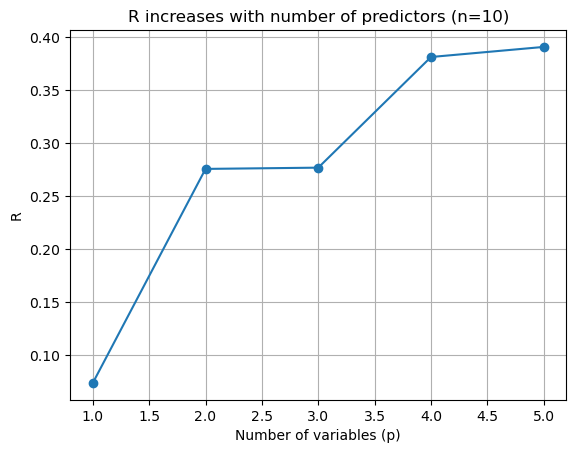


Note: When p = n - 1, model perfectly predicts y (R² ≈ 1, SSE ≈ 0).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
n = 20
p_max = 5

X_full = np.random.randn(n, p_max)
y = np.random.randn(n)

R2_list, R_list = [], []

for p in range(1, p_max + 1):
    X = X_full[:, :p]
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    R2_list.append(r2)
    R_list.append(np.sqrt(max(r2, 0)))
    print(f"p={p:2d} | R={np.sqrt(r2):.4f} | R²={r2:.6f} | df={n-(p+1)}")


# Plot R vs number of predictors
plt.plot(range(1, p_max + 1), R_list, marker='o')
plt.xlabel("Number of variables (p)")
plt.ylabel("R")
plt.title("R increases with number of predictors (n=10)")
plt.grid(True)
plt.show()

print("\nNote: When p = n - 1, model perfectly predicts y (R² ≈ 1, SSE ≈ 0).")

🧠 Interpretation
- Each time we add a new variable ($p$ increases), $R²$ and $R$ become larger.
- This happens even though the data are random — there’s no real relationship between $X$ and $y$.
- The example visually shows that $R$ (and $R²$) always increase with $p$, which is why model complexity must be controlled (e.g., by using adjusted $R²$, $AIC$, or cross-validation).

## Adjusted R² and AIC: Penalizing Model Complexity

While $R²$ always increases with more predictors, **Adjusted R²** and **AIC (Akaike Information Criterion)** penalize model complexity to prevent overfitting.

### Adjusted R²
Adjusted $R²$ accounts for the number of predictors and sample size:

$$\text{Adjusted } R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

- Unlike $R²$, Adjusted $R²$ can **decrease** if adding a predictor doesn't improve the model enough.
- A higher Adjusted $R²$ indicates a better model while penalizing unnecessary complexity.

### AIC (Akaike Information Criterion)
AIC balances model fit and complexity:

$$\text{AIC} = n \ln(\text{SSE}/n) + 2(p+1)$$

where $\text{SSE}$ is the sum of squared errors.

- **Lower AIC** indicates a better model.
- AIC penalizes models with more parameters, helping to avoid overfitting.

Both metrics help us choose the optimal number of predictors without blindly maximizing $R²$.## Adjusted R² and AIC: Penalizing Model Complexity

While $R²$ always increases with more predictors, **Adjusted R²** and **AIC (Akaike Information Criterion)** penalize model complexity to prevent overfitting.

p= 1 | R²=0.004726 | Adj R²=-0.050567 | AIC=5.8730
p= 2 | R²=0.044738 | Adj R²=-0.067646 | AIC=7.0524
p= 3 | R²=0.044785 | Adj R²=-0.134318 | AIC=9.0514
p= 4 | R²=0.053978 | Adj R²=-0.198295 | AIC=10.8580
p= 5 | R²=0.064048 | Adj R²=-0.270221 | AIC=12.6439
p= 6 | R²=0.134054 | Adj R²=-0.265613 | AIC=13.0891
p= 7 | R²=0.134239 | Adj R²=-0.370789 | AIC=15.0848
p= 8 | R²=0.216031 | Adj R²=-0.354129 | AIC=15.1000
p= 9 | R²=0.250232 | Adj R²=-0.424560 | AIC=16.2079
p=10 | R²=0.275487 | Adj R²=-0.529528 | AIC=17.5227


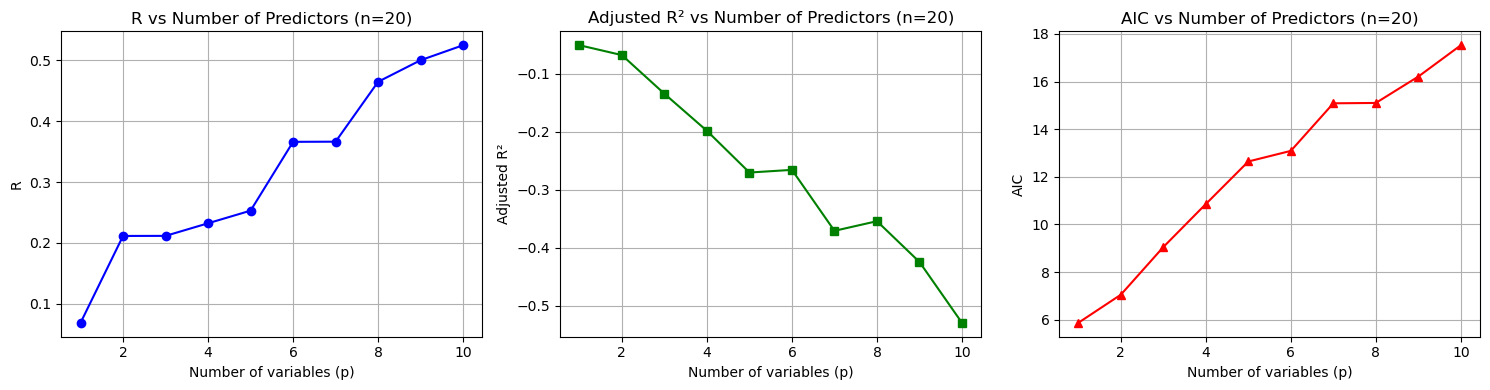

In [2]:
# Parameters: adjust these values
n = 20      # Sample size
p_max = 10   # Maximum number of predictors

# Generate random data
np.random.seed(42)
X_full = np.random.randn(n, p_max)
y = np.random.randn(n)

# Calculate Adjusted R² and AIC for each model
R2_list, R_list = [], []
R2_adj_list = []
AIC_list = []

for p in range(1, p_max + 1):
    X = X_full[:, :p]
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    R2_list.append(r2)
    R_list.append(np.sqrt(max(r2, 0)))
    
    # Calculate Adjusted R²
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    R2_adj_list.append(r2_adj)
    
    # Calculate AIC
    SSE = np.sum((y - y_pred) ** 2)
    AIC = n * np.log(SSE / n) + 2 * (p + 1)
    AIC_list.append(AIC)
    
    print(f"p={p:2d} | R²={r2:.6f} | Adj R²={r2_adj:.6f} | AIC={AIC:.4f}")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: R vs number of predictors
axes[0].plot(range(1, p_max + 1), R_list, marker='o', color='blue')
axes[0].set_xlabel("Number of variables (p)")
axes[0].set_ylabel("R")
axes[0].set_title(f"R vs Number of Predictors (n={n})")
axes[0].grid(True)

# Plot 2: Adjusted R² vs number of predictors
axes[1].plot(range(1, p_max + 1), R2_adj_list, marker='s', color='green')
axes[1].set_xlabel("Number of variables (p)")
axes[1].set_ylabel("Adjusted R²")
axes[1].set_title(f"Adjusted R² vs Number of Predictors (n={n})")
axes[1].grid(True)

# Plot 3: AIC vs number of predictors
axes[2].plot(range(1, p_max + 1), AIC_list, marker='^', color='red')
axes[2].set_xlabel("Number of variables (p)")
axes[2].set_ylabel("AIC")
axes[2].set_title(f"AIC vs Number of Predictors (n={n})")
axes[2].grid(True)

plt.tight_layout()
plt.show()

🧠 Interpretation
- R always increases with more predictors (overfitting risk)
- Adjusted R² penalizes complexity and may decrease if new predictors don't improve fit
- AIC penalizes complexity; lower values indicate better models